# An Automated,data-driven approach to crime pattern detection and prediction



### The data used for this project is taken from https://data.police.uk/data/
This project is focussed on crimes in **Greater Manchester area**, hence the records which are used for the task is of Greater Machester Area.


*In this jupitor notebook, you will find the entire process, codes used explanation of crime pattern detection and model creation and prediction*

This is a data  mining task, and there are 7 key steps which will be followed to achieve the target-

- *1) Data Integration: To combine different data sets and sources to perform analysis.*
- *2) Data Cleaning: Dirty and incomplete data leads to poor insights, hence cleaning required to allign it with the industry standard.*
- *3) Data reduction for quality data: Standard process to to extract relevant information for data analysis and pattern        evalusation.*
- *4) Data Transformation: To consolidate prepared data and make it suitable for data mining tasks. Involves major steps like         eliminating any noise, aggregation, normalization or discretiztion.*
- *5) Data Mining: Making use of the prepared data to prepare models and achieve the accuracy.*
- *6) Pattern Evaluation: To summarize information, use visualization data mining techniques to make it easier to understand.*
- *7) Representing knowledge in Data Mining: The whole process could be combined and presented as a report, an important step for someone working in an organisation to represnet their work to their leaders.*


## STEP 1) DATA INTEGRATION
This step involves combining different files together for the task.

**Starting by importing important libraries:-**

- OS : This module in Python provides a way of using operating system dependent functionality.

- os.getcwd(): It returns the current working directory of a process.

- os.chdir(): It chanes the current working directory to the given path.

- pandas : It stands for **Python Data Analysis Library**, it is mainly used for data analysis, allows importing data,data merging ,reshaping, data cleaning etc. 

- pwd: print working directory

- glob: This module is used to return all the file paths that match a specific pattern

In [1]:
import os
os.getcwd()
os.chdir('C:\\Users\\Harsh07\\OneDrive\\Desktop\\project\\DATA 24 MONTHS')
os.getcwd()


'C:\\Users\\Harsh07\\OneDrive\\Desktop\\project\\DATA 24 MONTHS'

In [2]:
pwd

'C:\\Users\\Harsh07\\OneDrive\\Desktop\\project\\DATA 24 MONTHS'

In [3]:
## the files are stored in folder - DATA 24 MONTHS AND REQUIRED TO BE AGGREGATED AS THE FILES ARE MONTHLY
# FILES AND HAS TO BE AGGREGATED TO WORK ON THE ALL 12 MONTHS FILE 

from glob import glob
files = glob('*-*')
files.sort()
files

['2018-01.csv',
 '2018-02.csv',
 '2018-03.csv',
 '2018-04.csv',
 '2018-05.csv',
 '2018-06.csv',
 '2018-07.csv',
 '2018-08.csv',
 '2018-09.csv',
 '2018-10.csv',
 '2018-11.csv',
 '2018-12.csv']

In [4]:
import pandas as pd

In [5]:
# CONCATENATE ALL MONTHLY FILES INTO ONE 
data = pd.concat( (pd.read_csv(file) for file in files), ignore_index= True)

In [6]:
# AGGREGATED 12 MONTHS DATA
data.head(100)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,9c48e3687788c1930bca1f1b6efdaea2882eeb89f44b42...,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,E01012628,Blackburn with Darwen 018D,Other theft,Investigation complete; no suspect identified,NaN
1,f0df3bd4a2d5123c5cebcb0f22361812b9d9117dcab47e...,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,E01012628,Blackburn with Darwen 018D,Robbery,Under investigation,NaN
2,0741743b9ee81d4ef8ffc170a090bd646aa1e4afa5797f...,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,E01012628,Blackburn with Darwen 018D,Violence and sexual offences,Offender given community sentence,NaN
3,3a6d3c03d45992e0e8592af145ec284b863e15112295f0...,2018-01,Greater Manchester Police,Greater Manchester Police,-2.444683,53.611159,On or near Horrocks Fold Avenue,E01004768,Bolton 001A,Burglary,Investigation complete; no suspect identified,NaN
4,69943711a03fa83acbb18325338e7845543a90c0df7526...,2018-01,Greater Manchester Police,Greater Manchester Police,-2.440493,53.612388,On or near Threlkeld Road,E01004768,Bolton 001A,Burglary,Investigation complete; no suspect identified,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,90c611414f6fd899f57982f06227990e84b9528ca14f20...,2018-01,Greater Manchester Police,Greater Manchester Police,-2.430315,53.607382,On or near Sharples Hall Fold,E01004773,Bolton 003D,Possession of weapons,Investigation complete; no suspect identified,NaN
96,79487d7ab9fa82ca1fb89cd734ece91394abddca7df793...,2018-01,Greater Manchester Police,Greater Manchester Police,-2.430315,53.607382,On or near Sharples Hall Fold,E01004773,Bolton 003D,Public order,Unable to prosecute suspect,NaN
97,40a4445785f5c3937f3379ee006a7f9877afd2b5cf9a5c...,2018-01,Greater Manchester Police,Greater Manchester Police,-2.430315,53.607382,On or near Sharples Hall Fold,E01004773,Bolton 003D,Robbery,Investigation complete; no suspect identified,NaN
98,1ea24ff5e04f0b8c01aea7d308d7719b1e042276c09b1b...,2018-01,Greater Manchester Police,Greater Manchester Police,-2.433207,53.603408,On or near Ramsay Street,E01004773,Bolton 003D,Theft from the person,Investigation complete; no suspect identified,NaN


In [7]:
 # creating a dataframe(2D data structure, data is alligned in a tabular fashion in rows and columns)
# to perform operations on rows and columns for data cleaning
df= pd.DataFrame(data)

**Check point**: *At this point we clearly see that 'df' dataframe contains 12 columns and 393161 rows which are presented below*

In [8]:
df.shape

(393161, 12)

In [9]:
# column labels of the dataframe df
df.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

In [10]:
df.groupby(by=['Month']).count()['Crime ID']


Month
2018-01    27177
2018-02    25181
2018-03    28290
2018-04    28107
2018-05    29233
2018-06    28819
2018-07    29917
2018-08    26979
2018-09    26142
2018-10    27635
2018-11    27732
2018-12    26073
Name: Crime ID, dtype: int64

In [11]:
# represents the dimensionality of the dataframe df
df.shape

(393161, 12)

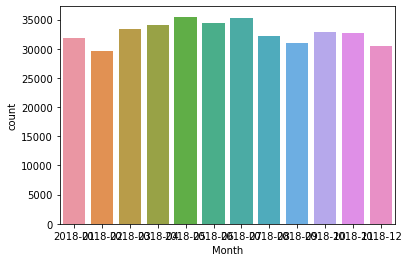

In [12]:
import seaborn as sns
ax = sns.countplot(x="Month", data=df)

In [24]:
# this step is done for storing the combined data in csv format for any reference
df.to_csv(r'Combineddata.csv', index = False, header=True)

In [13]:
df['Month'].unique()

array(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12'],
      dtype=object)

In [14]:
df.dtypes

Crime ID                  object
Month                     object
Reported by               object
Falls within              object
Longitude                float64
Latitude                 float64
Location                  object
LSOA code                 object
LSOA name                 object
Crime type                object
Last outcome category     object
Context                  float64
dtype: object

In [15]:
# to check if any column has missing values, and it is found that 
#columns: Crime ID, Last oucome Category, Context has missing values
df.isna().any()

Crime ID                  True
Month                    False
Reported by              False
Falls within             False
Longitude                False
Latitude                 False
Location                 False
LSOA code                False
LSOA name                False
Crime type               False
Last outcome category     True
Context                   True
dtype: bool

<AxesSubplot:>

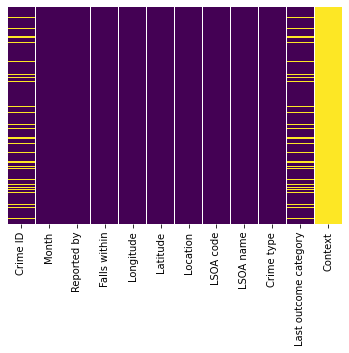

In [16]:
# the missing values in the column could be visualised using a heatmap,
# for the heatmap, I have mmported seaborn library
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## STEP 2) DATA CLEANING
Clearly, there are data missing from 3 columns and many ways to clean them but based on the tasks needs to be performed I can afford to delete the columns.



In [17]:
# creating a new dataframe df1 and carrying on the process
df1=df
df1

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,9c48e3687788c1930bca1f1b6efdaea2882eeb89f44b42...,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,E01012628,Blackburn with Darwen 018D,Other theft,Investigation complete; no suspect identified,NaN
1,f0df3bd4a2d5123c5cebcb0f22361812b9d9117dcab47e...,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,E01012628,Blackburn with Darwen 018D,Robbery,Under investigation,NaN
2,0741743b9ee81d4ef8ffc170a090bd646aa1e4afa5797f...,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,E01012628,Blackburn with Darwen 018D,Violence and sexual offences,Offender given community sentence,NaN
3,3a6d3c03d45992e0e8592af145ec284b863e15112295f0...,2018-01,Greater Manchester Police,Greater Manchester Police,-2.444683,53.611159,On or near Horrocks Fold Avenue,E01004768,Bolton 001A,Burglary,Investigation complete; no suspect identified,NaN
4,69943711a03fa83acbb18325338e7845543a90c0df7526...,2018-01,Greater Manchester Police,Greater Manchester Police,-2.440493,53.612388,On or near Threlkeld Road,E01004768,Bolton 001A,Burglary,Investigation complete; no suspect identified,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
393156,NaN,2018-12,Greater Manchester Police,Greater Manchester Police,-2.565764,53.470625,On or near Norwood Avenue,E01006347,Wigan 040E,Anti-social behaviour,NaN,NaN
393157,1f3987a314c5b74816d8feedd1f6b3fa5daacc91c03451...,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,On or near Martland Avenue,E01006347,Wigan 040E,Burglary,Investigation complete; no suspect identified,NaN
393158,3efe56bcd17b6c3510dc1f0866386fc9f82ff1d827228f...,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,On or near Martland Avenue,E01006347,Wigan 040E,Burglary,Investigation complete; no suspect identified,NaN
393159,87e014001ff55bf3ced8729881f01de0626e122bf78019...,2018-12,Greater Manchester Police,Greater Manchester Police,-2.570491,53.470387,On or near Malton Avenue,E01006347,Wigan 040E,Vehicle crime,Investigation complete; no suspect identified,NaN


In [18]:
# droping the columns which have missing value and are not required for further process
df1=df1.drop(['Crime ID','Context','Last outcome category'],axis=1)
df1


,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,E01012628,Blackburn with Darwen 018D,Other theft
1,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,E01012628,Blackburn with Darwen 018D,Robbery
2,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,E01012628,Blackburn with Darwen 018D,Violence and sexual offences
3,2018-01,Greater Manchester Police,Greater Manchester Police,-2.444683,53.611159,On or near Horrocks Fold Avenue,E01004768,Bolton 001A,Burglary
4,2018-01,Greater Manchester Police,Greater Manchester Police,-2.440493,53.612388,On or near Threlkeld Road,E01004768,Bolton 001A,Burglary
...,...,...,...,...,...,...,...,...,...
393156,2018-12,Greater Manchester Police,Greater Manchester Police,-2.565764,53.470625,On or near Norwood Avenue,E01006347,Wigan 040E,Anti-social behaviour
393157,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,On or near Martland Avenue,E01006347,Wigan 040E,Burglary
393158,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,On or near Martland Avenue,E01006347,Wigan 040E,Burglary
393159,2018-12,Greater Manchester Police,Greater Manchester Police,-2.570491,53.470387,On or near Malton Avenue,E01006347,Wigan 040E,Vehicle crime


<AxesSubplot:>

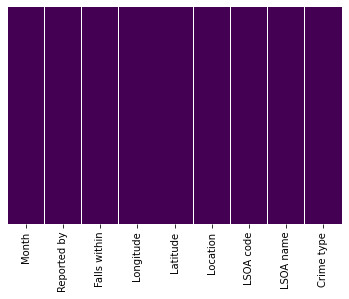

In [19]:
# checking if the dropped columns removed the missing values in the dataframe
# using the heatmap but this time on dataframe df1 
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Check point**: *At this point we clearly see that the yellow lines are removed and so are the missing data 

## STEP 3) DATA REDUCTION
This step involves multiple data reduction processes which would lead us to required data analysis.

Majorly, you will see the LSOA which is lower layer super output areas are combined into larger Areas for the task.




In [20]:
# there are 1693 unique LSOA code 
len(df1['LSOA code'].unique())

1693

In [21]:
# 1693 LSOAs names
df1['LSOA name'].value_counts()

Manchester 055B       8488
Manchester 054C       7761
Manchester 060A       3553
Tameside 013A         2614
Rochdale 010C         2595
                      ... 
St. Helens 003B          1
Cheshire East 004C       1
Rossendale 008A          1
Calderdale 022C          1
Chorley 013A             1
Name: LSOA name, Length: 1693, dtype: int64

In [22]:
# creating a new dataframe df2 and assigning it df1 values and continuing the task
df2=df1
df2


,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,E01012628,Blackburn with Darwen 018D,Other theft
1,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,E01012628,Blackburn with Darwen 018D,Robbery
2,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,E01012628,Blackburn with Darwen 018D,Violence and sexual offences
3,2018-01,Greater Manchester Police,Greater Manchester Police,-2.444683,53.611159,On or near Horrocks Fold Avenue,E01004768,Bolton 001A,Burglary
4,2018-01,Greater Manchester Police,Greater Manchester Police,-2.440493,53.612388,On or near Threlkeld Road,E01004768,Bolton 001A,Burglary
...,...,...,...,...,...,...,...,...,...
393156,2018-12,Greater Manchester Police,Greater Manchester Police,-2.565764,53.470625,On or near Norwood Avenue,E01006347,Wigan 040E,Anti-social behaviour
393157,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,On or near Martland Avenue,E01006347,Wigan 040E,Burglary
393158,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,On or near Martland Avenue,E01006347,Wigan 040E,Burglary
393159,2018-12,Greater Manchester Police,Greater Manchester Police,-2.570491,53.470387,On or near Malton Avenue,E01006347,Wigan 040E,Vehicle crime


In [23]:
df2.tail(1000)

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
392161,2018-12,Greater Manchester Police,Greater Manchester Police,-2.467025,53.515473,On or near John Street,E01006294,Wigan 025B,Violence and sexual offences
392162,2018-12,Greater Manchester Police,Greater Manchester Police,-2.456737,53.513877,On or near Unsworth Street,E01006294,Wigan 025B,Violence and sexual offences
392163,2018-12,Greater Manchester Police,Greater Manchester Police,-2.455761,53.514249,On or near Ratcliffe Street,E01006294,Wigan 025B,Violence and sexual offences
392164,2018-12,Greater Manchester Police,Greater Manchester Police,-2.466857,53.513991,On or near Elliott Street,E01006294,Wigan 025B,Violence and sexual offences
392165,2018-12,Greater Manchester Police,Greater Manchester Police,-2.467025,53.515473,On or near John Street,E01006294,Wigan 025B,Violence and sexual offences
...,...,...,...,...,...,...,...,...,...
393156,2018-12,Greater Manchester Police,Greater Manchester Police,-2.565764,53.470625,On or near Norwood Avenue,E01006347,Wigan 040E,Anti-social behaviour
393157,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,On or near Martland Avenue,E01006347,Wigan 040E,Burglary
393158,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,On or near Martland Avenue,E01006347,Wigan 040E,Burglary
393159,2018-12,Greater Manchester Police,Greater Manchester Police,-2.570491,53.470387,On or near Malton Avenue,E01006347,Wigan 040E,Vehicle crime


In [24]:
# creating a new column and combining the LSOAs into larger areas 
df2['Area']=df2['LSOA name'].str.split(' ').str[0]
df2

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Area
0,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,E01012628,Blackburn with Darwen 018D,Other theft,Blackburn
1,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,E01012628,Blackburn with Darwen 018D,Robbery,Blackburn
2,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,E01012628,Blackburn with Darwen 018D,Violence and sexual offences,Blackburn
3,2018-01,Greater Manchester Police,Greater Manchester Police,-2.444683,53.611159,On or near Horrocks Fold Avenue,E01004768,Bolton 001A,Burglary,Bolton
4,2018-01,Greater Manchester Police,Greater Manchester Police,-2.440493,53.612388,On or near Threlkeld Road,E01004768,Bolton 001A,Burglary,Bolton
...,...,...,...,...,...,...,...,...,...,...
393156,2018-12,Greater Manchester Police,Greater Manchester Police,-2.565764,53.470625,On or near Norwood Avenue,E01006347,Wigan 040E,Anti-social behaviour,Wigan
393157,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,On or near Martland Avenue,E01006347,Wigan 040E,Burglary,Wigan
393158,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,On or near Martland Avenue,E01006347,Wigan 040E,Burglary,Wigan
393159,2018-12,Greater Manchester Police,Greater Manchester Police,-2.570491,53.470387,On or near Malton Avenue,E01006347,Wigan 040E,Vehicle crime,Wigan


In [25]:
# after creatinon of the new column Area, the value counts-
df2['Area'].value_counts()

Manchester    112485
Bolton         40912
Wigan          35294
Oldham         35213
Salford        34938
Rochdale       31152
Tameside       30396
Stockport      28797
Bury           22269
Trafford       21565
Warrington        44
Cheshire          38
Blackburn         17
Rossendale        15
St.               12
West               8
Calderdale         4
Chorley            1
High               1
Name: Area, dtype: int64

In [71]:
#df4['Area'].value_counts()

Manchester    112485
Bolton         40912
Wigan          35294
Oldham         35213
Salford        34938
Rochdale       31152
Tameside       30396
Stockport      28797
Bury           22269
Trafford       21565
Warrington        44
Cheshire          38
Blackburn         17
Rossendale        15
St.               12
West               8
Calderdale         4
Chorley            1
High               1
Name: Area, dtype: int64

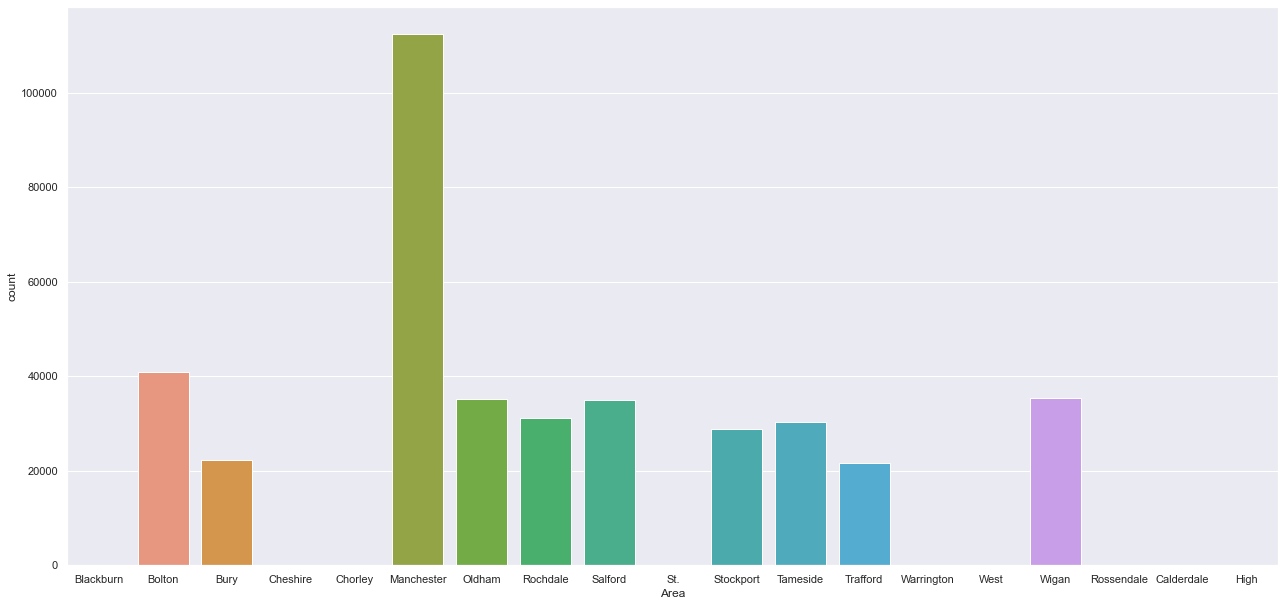

In [26]:
#import seaborn as sns
sns.set(rc={'figure.figsize':(21.7,10.27)})
ax = sns.countplot(x="Area", data=df2)


In [27]:
# it's very evident that the after performing the above data reduction technique
# the unique length of the column has significantly decreased from 1693 to just 19
len(df2['Area'].unique())

19

In [29]:
#creating a new dataframe df3 and performming the task
df3=df2

In [30]:
# now we have 'Area', we could afford to drop 'LSOA name' and 'LSOA code'
df3=df3.drop(['LSOA name','LSOA code'],axis=1)
df3


,Month,Reported by,Falls within,Longitude,Latitude,Location,Crime type,Area
0,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,Other theft,Blackburn
1,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,Robbery,Blackburn
2,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,Violence and sexual offences,Blackburn
3,2018-01,Greater Manchester Police,Greater Manchester Police,-2.444683,53.611159,On or near Horrocks Fold Avenue,Burglary,Bolton
4,2018-01,Greater Manchester Police,Greater Manchester Police,-2.440493,53.612388,On or near Threlkeld Road,Burglary,Bolton
...,...,...,...,...,...,...,...,...
393156,2018-12,Greater Manchester Police,Greater Manchester Police,-2.565764,53.470625,On or near Norwood Avenue,Anti-social behaviour,Wigan
393157,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,On or near Martland Avenue,Burglary,Wigan
393158,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,On or near Martland Avenue,Burglary,Wigan
393159,2018-12,Greater Manchester Police,Greater Manchester Police,-2.570491,53.470387,On or near Malton Avenue,Vehicle crime,Wigan


In [31]:
len(df3['Crime type'].unique())

14

In [32]:
# there are 14 unique elements in 'Crime type'
df3['Crime type'].value_counts()

Violence and sexual offences    108035
Anti-social behaviour            61876
Public order                     45770
Criminal damage and arson        36118
Vehicle crime                    31845
Burglary                         30198
Other theft                      26438
Shoplifting                      17394
Other crime                       7935
Robbery                           7586
Theft from the person             7357
Drugs                             5030
Bicycle theft                     4093
Possession of weapons             3486
Name: Crime type, dtype: int64

In [33]:
df4=df3

#### *Crime type can be reduced and combined into larger groups*

- Since bicycle could be considered as vehicle and 'Bicycle theft' could be combined with **'Vehicle crime'**
- Burglary,Theft from the person,Shoplifting,Robbery,Other theft could be combined together and be named **'Theft'**


In [34]:
#combining the crime types using .str.replace()

df4['Crime type'] = df4['Crime type'].str.replace('Bicycle theft','Vehicle crime')
df4['Crime type'] = df4['Crime type'].str.replace('Burglary','Theft')
df4['Crime type'] = df4['Crime type'].str.replace('Other theft','Theft')
df4['Crime type'] = df4['Crime type'].str.replace('Theft from the person','Theft')
df4['Crime type'] = df4['Crime type'].str.replace('Shoplifting','Theft')
df4['Crime type'] = df4['Crime type'].str.replace('Robbery','Theft')


In [35]:
df4

,Month,Reported by,Falls within,Longitude,Latitude,Location,Crime type,Area
0,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,Theft,Blackburn
1,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,Theft,Blackburn
2,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,Violence and sexual offences,Blackburn
3,2018-01,Greater Manchester Police,Greater Manchester Police,-2.444683,53.611159,On or near Horrocks Fold Avenue,Theft,Bolton
4,2018-01,Greater Manchester Police,Greater Manchester Police,-2.440493,53.612388,On or near Threlkeld Road,Theft,Bolton
...,...,...,...,...,...,...,...,...
393156,2018-12,Greater Manchester Police,Greater Manchester Police,-2.565764,53.470625,On or near Norwood Avenue,Anti-social behaviour,Wigan
393157,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,On or near Martland Avenue,Theft,Wigan
393158,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,On or near Martland Avenue,Theft,Wigan
393159,2018-12,Greater Manchester Police,Greater Manchester Police,-2.570491,53.470387,On or near Malton Avenue,Vehicle crime,Wigan


In [36]:
# it's very evident that the after performing the above data reduction technique
# the unique length of the column 'Crime type' has significantly decreased from 14 to just 10
len(df4['Crime type'].unique())

9

In [37]:
df4['Crime type'].value_counts()

Violence and sexual offences    108035
Theft                            88973
Anti-social behaviour            61876
Public order                     45770
Criminal damage and arson        36118
Vehicle crime                    35938
Other crime                       7935
Drugs                             5030
Possession of weapons             3486
Name: Crime type, dtype: int64

In [38]:
df5=df4

In [39]:
#df4
df4.sort_values('Month',ascending=False) 


,Month,Reported by,Falls within,Longitude,Latitude,Location,Crime type,Area
393160,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573608,53.469132,On or near Stretton Avenue,Vehicle crime,Wigan
372915,2018-12,Greater Manchester Police,Greater Manchester Police,-2.278631,53.376757,On or near Pitchcombe Road,Theft,Manchester
372903,2018-12,Greater Manchester Police,Greater Manchester Police,-2.285614,53.384704,On or near Shadowbrook Avenue,Violence and sexual offences,Manchester
372904,2018-12,Greater Manchester Police,Greater Manchester Police,-2.283355,53.384126,On or near Luton Drive,Violence and sexual offences,Manchester
372905,2018-12,Greater Manchester Police,Greater Manchester Police,-2.285614,53.384704,On or near Shadowbrook Avenue,Violence and sexual offences,Manchester
...,...,...,...,...,...,...,...,...
21188,2018-01,Greater Manchester Police,Greater Manchester Police,-2.347402,53.483891,On or near Gladstone Road,Public order,Salford
21189,2018-01,Greater Manchester Police,Greater Manchester Police,-2.343636,53.484055,On or near Plum Tree Close,Public order,Salford
21190,2018-01,Greater Manchester Police,Greater Manchester Police,-2.351361,53.485138,On or near Hampden Grove,Violence and sexual offences,Salford
21191,2018-01,Greater Manchester Police,Greater Manchester Police,-2.343636,53.484055,On or near Plum Tree Close,Violence and sexual offences,Salford


In [40]:
df4.sort_values('Month',ascending=False) 

,Month,Reported by,Falls within,Longitude,Latitude,Location,Crime type,Area
393160,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573608,53.469132,On or near Stretton Avenue,Vehicle crime,Wigan
372915,2018-12,Greater Manchester Police,Greater Manchester Police,-2.278631,53.376757,On or near Pitchcombe Road,Theft,Manchester
372903,2018-12,Greater Manchester Police,Greater Manchester Police,-2.285614,53.384704,On or near Shadowbrook Avenue,Violence and sexual offences,Manchester
372904,2018-12,Greater Manchester Police,Greater Manchester Police,-2.283355,53.384126,On or near Luton Drive,Violence and sexual offences,Manchester
372905,2018-12,Greater Manchester Police,Greater Manchester Police,-2.285614,53.384704,On or near Shadowbrook Avenue,Violence and sexual offences,Manchester
...,...,...,...,...,...,...,...,...
21188,2018-01,Greater Manchester Police,Greater Manchester Police,-2.347402,53.483891,On or near Gladstone Road,Public order,Salford
21189,2018-01,Greater Manchester Police,Greater Manchester Police,-2.343636,53.484055,On or near Plum Tree Close,Public order,Salford
21190,2018-01,Greater Manchester Police,Greater Manchester Police,-2.351361,53.485138,On or near Hampden Grove,Violence and sexual offences,Salford
21191,2018-01,Greater Manchester Police,Greater Manchester Police,-2.343636,53.484055,On or near Plum Tree Close,Violence and sexual offences,Salford


In [41]:
df4['Month'].max

<bound method Series.max of 0         2018-01
1         2018-01
2         2018-01
3         2018-01
4         2018-01
           ...   
393156    2018-12
393157    2018-12
393158    2018-12
393159    2018-12
393160    2018-12
Name: Month, Length: 393161, dtype: object>

## STEP 4) DATA TRANSFORMATION
This step involves data aggregation processes. Data will be consolidated so that data mininig process code be more efficient. 



In [42]:
#df1.groupby(['Month','LSOA code','Crime type']).count()
#grouped = df15.groupby(['Month', 'LSOA code', 'Crime type'])['Crime type'].size().reset_index(name='freq')
#grouped

In [43]:
grouped = df5.groupby(['Month','Area','Crime type'])['Crime type'].size().reset_index(name='freq')
grouped



,Month,Area,Crime type,freq
0,2018-01,Blackburn,Theft,2
1,2018-01,Blackburn,Violence and sexual offences,1
2,2018-01,Bolton,Anti-social behaviour,399
3,2018-01,Bolton,Criminal damage and arson,376
4,2018-01,Bolton,Drugs,33
...,...,...,...,...
1174,2018-12,Wigan,Possession of weapons,13
1175,2018-12,Wigan,Public order,250
1176,2018-12,Wigan,Theft,653
1177,2018-12,Wigan,Vehicle crime,255


In [44]:
grp=grouped

In [45]:
grp['month']=grouped['Month'].str.split('-').str[1]
grp

,Month,Area,Crime type,freq,month
0,2018-01,Blackburn,Theft,2,01
1,2018-01,Blackburn,Violence and sexual offences,1,01
2,2018-01,Bolton,Anti-social behaviour,399,01
3,2018-01,Bolton,Criminal damage and arson,376,01
4,2018-01,Bolton,Drugs,33,01
...,...,...,...,...,...
1174,2018-12,Wigan,Possession of weapons,13,12
1175,2018-12,Wigan,Public order,250,12
1176,2018-12,Wigan,Theft,653,12
1177,2018-12,Wigan,Vehicle crime,255,12


In [46]:
grp=grp.drop(['Month'],axis=1)

In [47]:
grp

,Area,Crime type,freq,month
0,Blackburn,Theft,2,01
1,Blackburn,Violence and sexual offences,1,01
2,Bolton,Anti-social behaviour,399,01
3,Bolton,Criminal damage and arson,376,01
4,Bolton,Drugs,33,01
...,...,...,...,...
1174,Wigan,Possession of weapons,13,12
1175,Wigan,Public order,250,12
1176,Wigan,Theft,653,12
1177,Wigan,Vehicle crime,255,12


In [48]:
len(grp)

1179

In [49]:
grp1=grp

In [50]:
grp2= grp1.reindex(columns=['month','Area','Crime type','freq'])
grp2

,month,Area,Crime type,freq
0,01,Blackburn,Theft,2
1,01,Blackburn,Violence and sexual offences,1
2,01,Bolton,Anti-social behaviour,399
3,01,Bolton,Criminal damage and arson,376
4,01,Bolton,Drugs,33
...,...,...,...,...
1174,12,Wigan,Possession of weapons,13
1175,12,Wigan,Public order,250
1176,12,Wigan,Theft,653
1177,12,Wigan,Vehicle crime,255


In [53]:
grp2["month"] = grp2.month.astype(int)


In [54]:
grp2.dtypes

month          int32
Area          object
Crime type    object
freq           int64
dtype: object

In [78]:
grp2.to_csv(r'grouped.csv', index = False, header=True)

In [55]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set(style="ticks", color_codes=True)
sns.set_context("notebook")
sns.set({ "figure.figsize": (20/1.5,10/1.5) })
# plt.rcParams['figure.dpi']= 300

array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'freq'}>]], dtype=object)

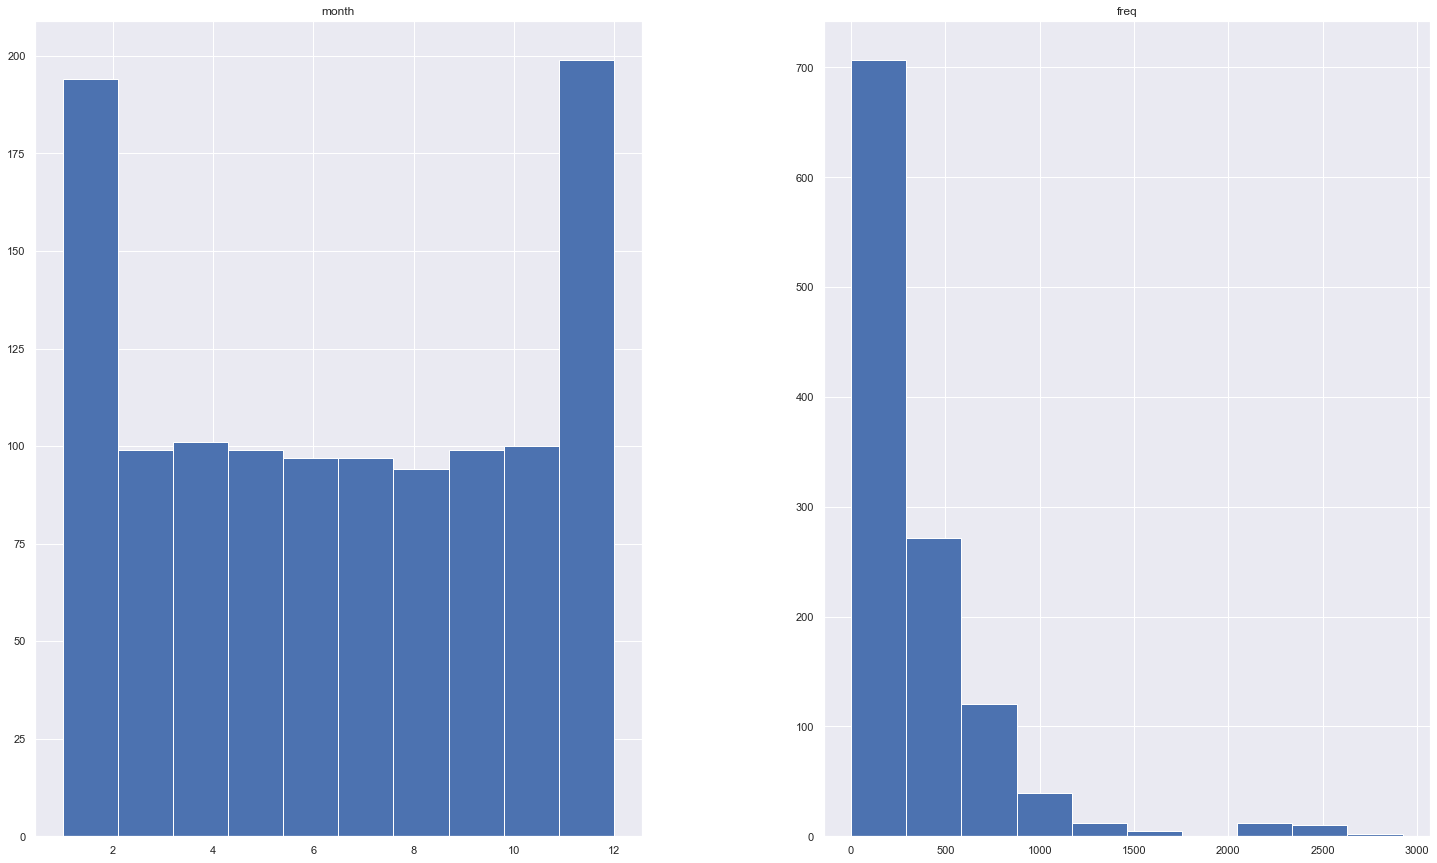

In [50]:
grp2.hist(figsize=(25,15))

<AxesSubplot:xlabel='Crime type', ylabel='count'>

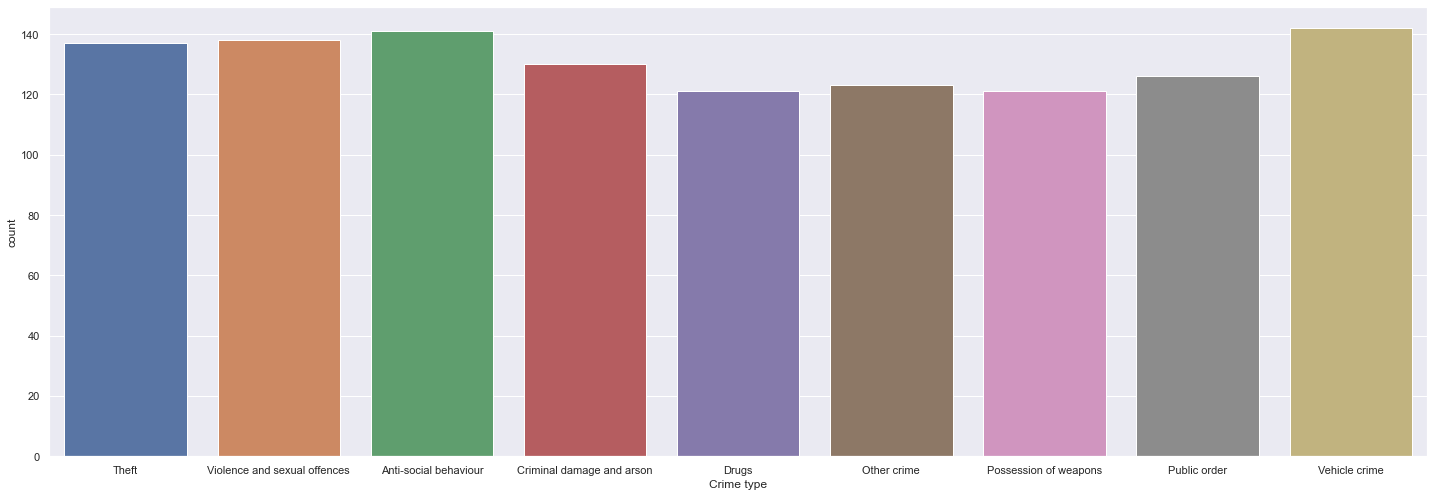

In [52]:
import seaborn as sns
sns.set(rc={'figure.figsize':(24.7,8.27)})
sns.countplot(x='Crime type',data=grp2)

<AxesSubplot:xlabel='Area', ylabel='count'>

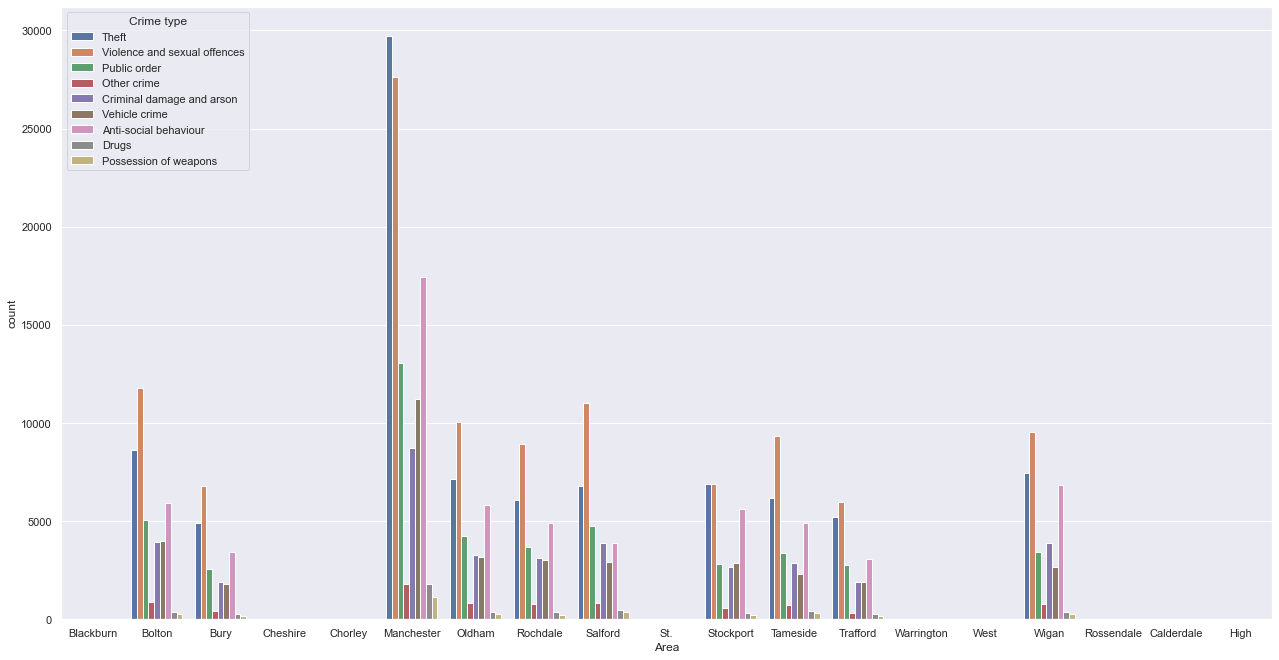

In [56]:
sns.set(rc={'figure.figsize':(21.7,11.27)})
sns.countplot(x="Area", hue="Crime type", data=df4)

In [57]:
sv=df4[df4['Crime type']=='Violence and sexual offences']
sv

,Month,Reported by,Falls within,Longitude,Latitude,Location,Crime type,Area
2,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,Violence and sexual offences,Blackburn
8,2018-01,Greater Manchester Police,Greater Manchester Police,-2.464422,53.612495,On or near Parking Area,Violence and sexual offences,Bolton
9,2018-01,Greater Manchester Police,Greater Manchester Police,-2.437410,53.613882,On or near Radstock Close,Violence and sexual offences,Bolton
10,2018-01,Greater Manchester Police,Greater Manchester Police,-2.440493,53.612388,On or near Threlkeld Road,Violence and sexual offences,Bolton
11,2018-01,Greater Manchester Police,Greater Manchester Police,-2.444807,53.611509,On or near Belmont Road,Violence and sexual offences,Bolton
...,...,...,...,...,...,...,...,...
393147,2018-12,Greater Manchester Police,Greater Manchester Police,-2.558926,53.470738,On or near Cedar Avenue,Violence and sexual offences,Wigan
393148,2018-12,Greater Manchester Police,Greater Manchester Police,-2.569187,53.465207,On or near Kirkham Avenue,Violence and sexual offences,Wigan
393152,2018-12,Greater Manchester Police,Greater Manchester Police,-2.560912,53.475070,On or near Waddington Close,Violence and sexual offences,Wigan
393153,2018-12,Greater Manchester Police,Greater Manchester Police,-2.565074,53.475374,On or near Edgerton Road,Violence and sexual offences,Wigan


<AxesSubplot:xlabel='Crime type', ylabel='count'>

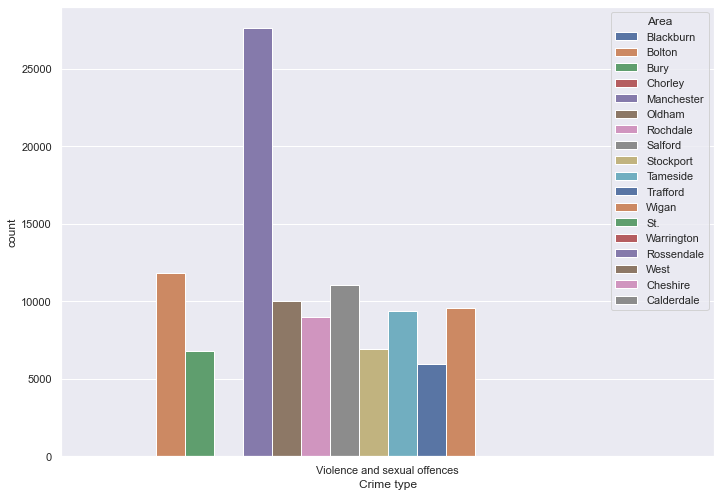

In [58]:
sv=df4[df4['Crime type']=='Violence and sexual offences']
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="Crime type", hue="Area", data=sv,palette='deep')

In [99]:
sv['Area'].value_counts()
#sv=df4[df4['Crime type']=='Violence and sexual offences']

Manchester    27610
Bolton        11805
Salford       11041
Oldham        10031
Wigan          9561
Tameside       9340
Rochdale       8952
Stockport      6885
Bury           6813
Trafford       5977
St.               4
Blackburn         4
Cheshire          4
Rossendale        2
West              2
Warrington        2
Chorley           1
Calderdale        1
Name: Area, dtype: int64

In [60]:
nsv=df4[df4['Crime type']!='Violence and sexual offences']
nsv

,Month,Reported by,Falls within,Longitude,Latitude,Location,Crime type,Area
0,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,Theft,Blackburn
1,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,Theft,Blackburn
3,2018-01,Greater Manchester Police,Greater Manchester Police,-2.444683,53.611159,On or near Horrocks Fold Avenue,Theft,Bolton
4,2018-01,Greater Manchester Police,Greater Manchester Police,-2.440493,53.612388,On or near Threlkeld Road,Theft,Bolton
5,2018-01,Greater Manchester Police,Greater Manchester Police,-2.438828,53.612133,On or near Thirlspot Close,Theft,Bolton
...,...,...,...,...,...,...,...,...
393156,2018-12,Greater Manchester Police,Greater Manchester Police,-2.565764,53.470625,On or near Norwood Avenue,Anti-social behaviour,Wigan
393157,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,On or near Martland Avenue,Theft,Wigan
393158,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,On or near Martland Avenue,Theft,Wigan
393159,2018-12,Greater Manchester Police,Greater Manchester Police,-2.570491,53.470387,On or near Malton Avenue,Vehicle crime,Wigan


In [61]:
nsv['Crime type'].value_counts()

Theft                        88973
Anti-social behaviour        61876
Public order                 45770
Criminal damage and arson    36118
Vehicle crime                35938
Other crime                   7935
Drugs                         5030
Possession of weapons         3486
Name: Crime type, dtype: int64

<AxesSubplot:xlabel='Crime type', ylabel='count'>

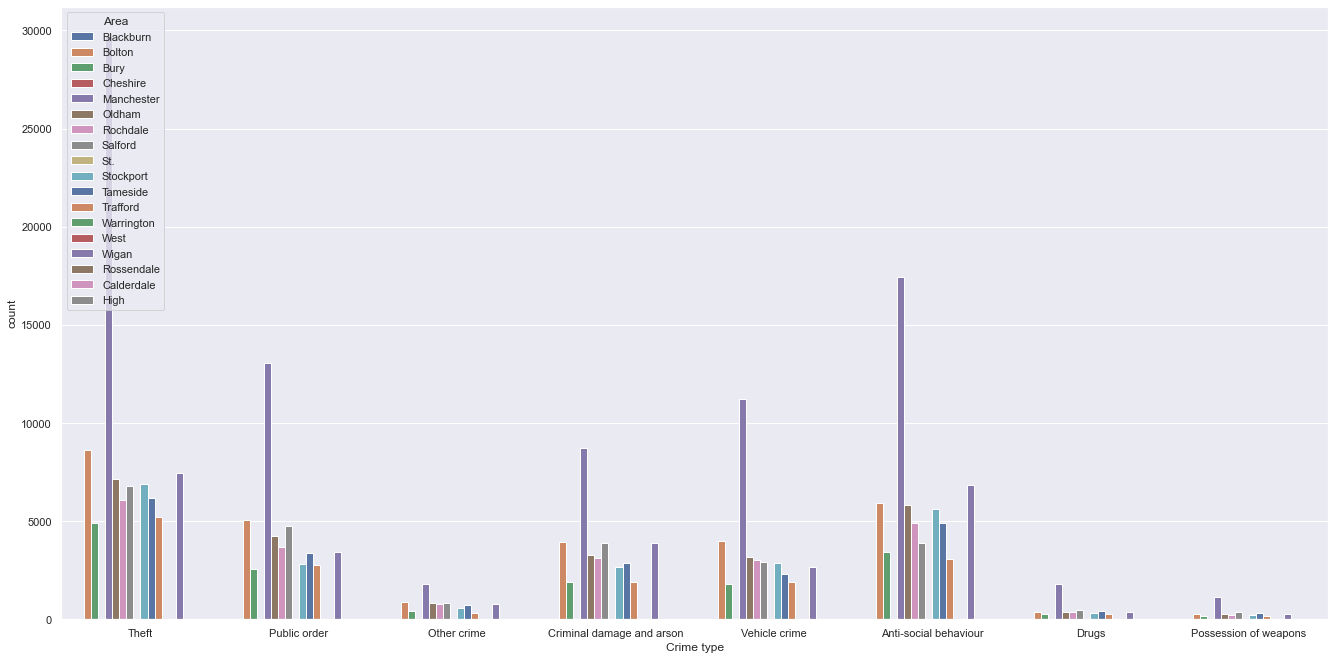

In [151]:
#nsv dataframe has the values related to crimes other than biolence and sexual crimes
nsv=df4[df4['Crime type']!='Violence and sexual offences']
sns.set(rc={'figure.figsize':(22.7,11.27)})
sns.countplot(x="Crime type", hue="Area", data=nsv,palette='deep')

<AxesSubplot:xlabel='count', ylabel='Crime type'>

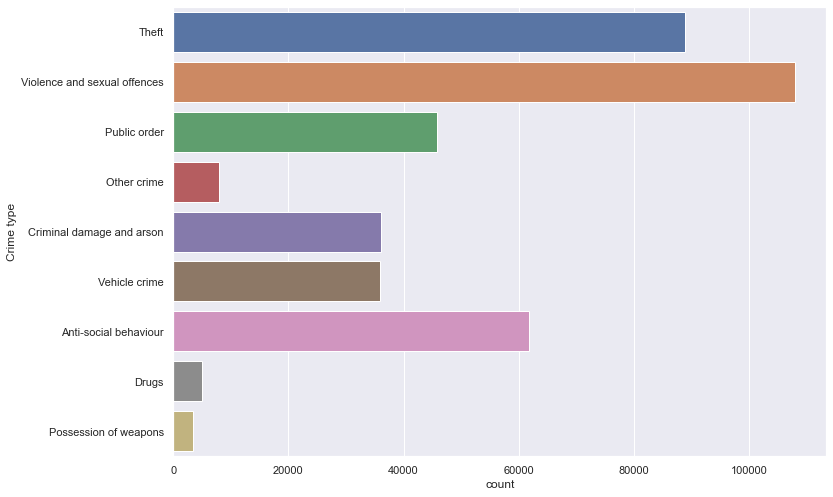

In [62]:
sns.countplot(y='Crime type',data=df4)

<AxesSubplot:xlabel='Area', ylabel='count'>

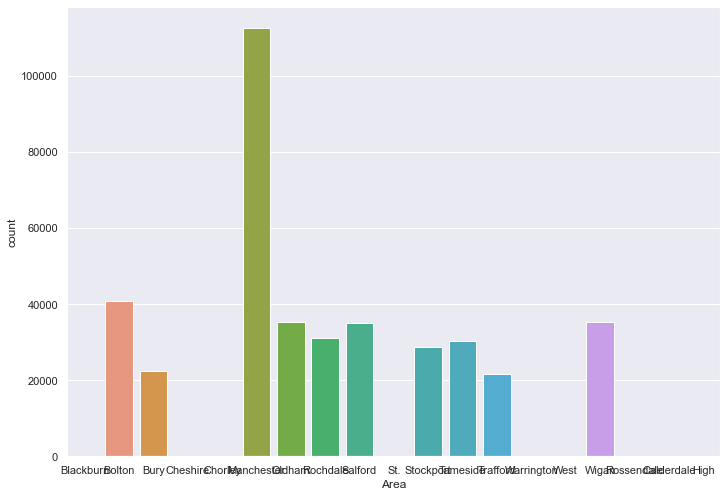

In [63]:
sns.countplot(x='Area',data=df4)

In [64]:
df4['Area'].value_counts()

Manchester    112485
Bolton         40912
Wigan          35294
Oldham         35213
Salford        34938
Rochdale       31152
Tameside       30396
Stockport      28797
Bury           22269
Trafford       21565
Warrington        44
Cheshire          38
Blackburn         17
Rossendale        15
St.               12
West               8
Calderdale         4
Chorley            1
High               1
Name: Area, dtype: int64

<AxesSubplot:xlabel='Crime type', ylabel='count'>

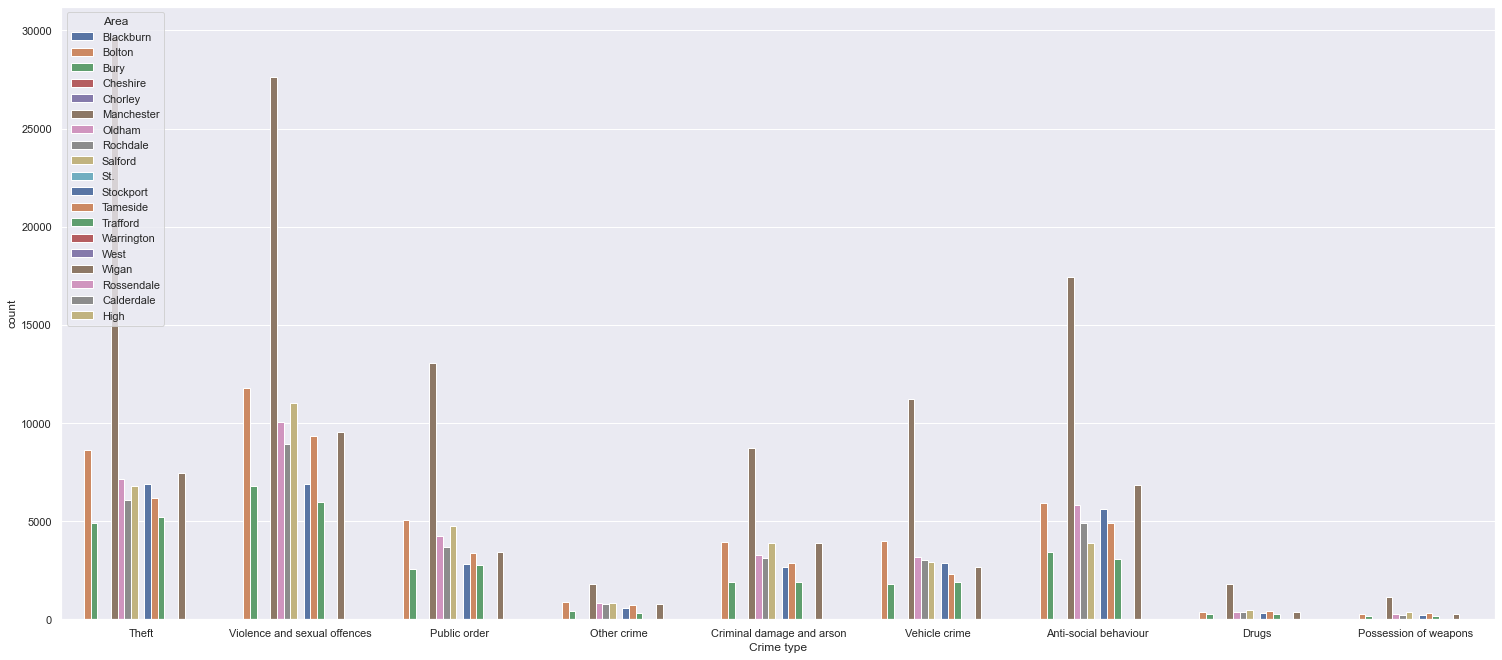

In [65]:
sns.set(rc={'figure.figsize':(25.7,11.27)})
sns.countplot(x='Crime type',data=df4,hue='Area',palette='deep')

In [66]:
grp2['Crime type'].value_counts()

Vehicle crime                   142
Anti-social behaviour           141
Violence and sexual offences    138
Theft                           137
Criminal damage and arson       130
Public order                    126
Other crime                     123
Drugs                           121
Possession of weapons           121
Name: Crime type, dtype: int64

<AxesSubplot:xlabel='Crime type', ylabel='freq'>

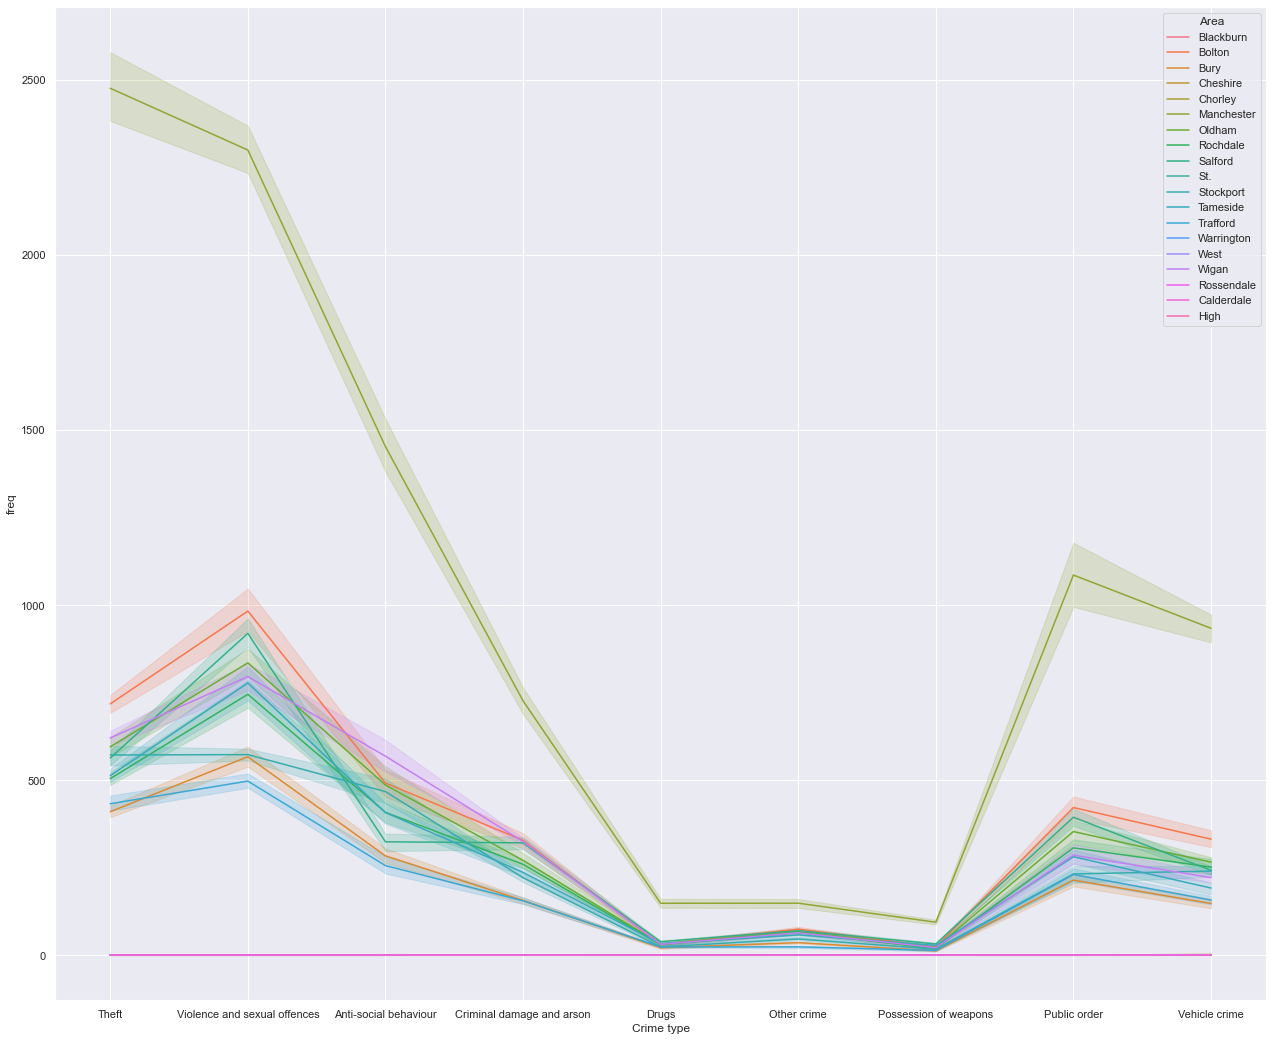

In [116]:
sns.set(rc={'figure.figsize':(21.7,18.27)})
sns.lineplot(data=grp2, x='Crime type',y='freq',hue='Area')

In [67]:
sex_violence=grp2[grp2['Crime type']=='Violence and sexual offences']
sex_violence

,month,Area,Crime type,freq
1,1,Blackburn,Violence and sexual offences,1
10,1,Bolton,Violence and sexual offences,923
19,1,Bury,Violence and sexual offences,580
21,1,Chorley,Violence and sexual offences,1
30,1,Manchester,Violence and sexual offences,2276
...,...,...,...,...
1138,12,Salford,Violence and sexual offences,898
1147,12,Stockport,Violence and sexual offences,557
1156,12,Tameside,Violence and sexual offences,858
1165,12,Trafford,Violence and sexual offences,514


<AxesSubplot:xlabel='Area', ylabel='count'>

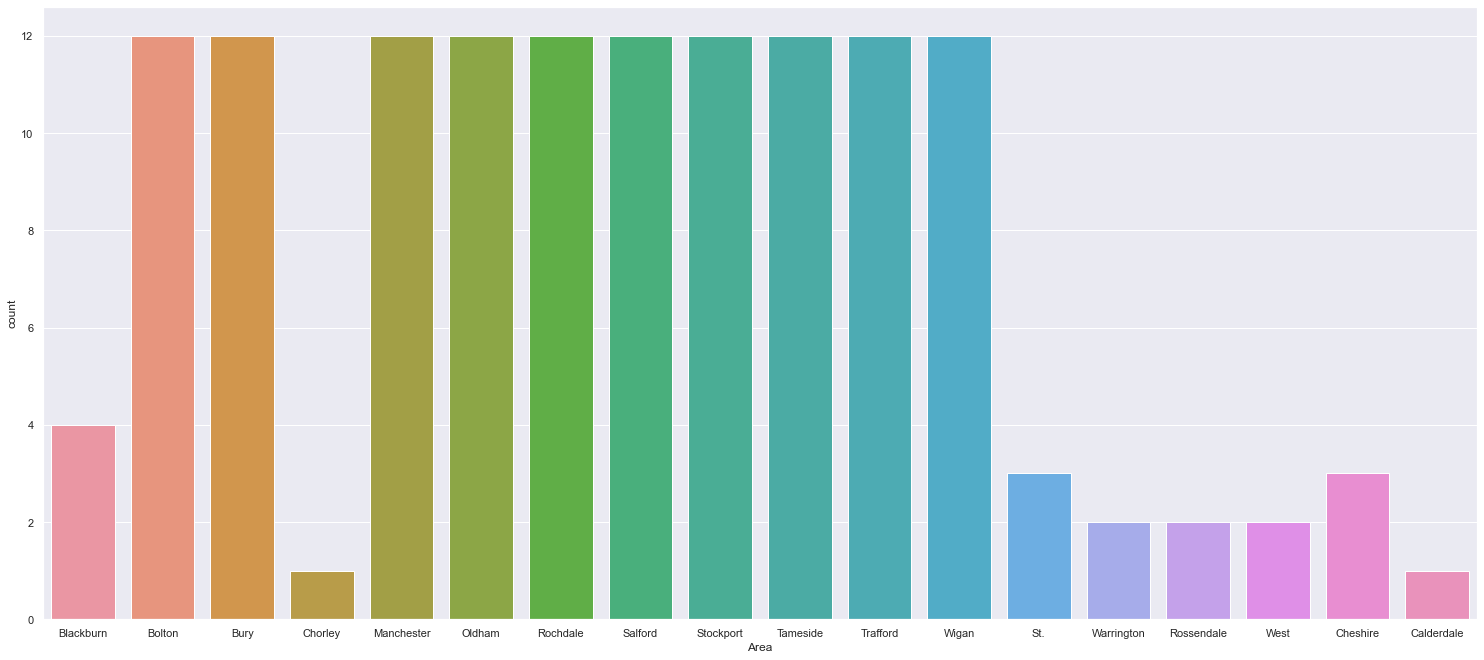

In [68]:
sns.countplot(x='Area',data=sex_violence)

<AxesSubplot:xlabel='Area', ylabel='count'>

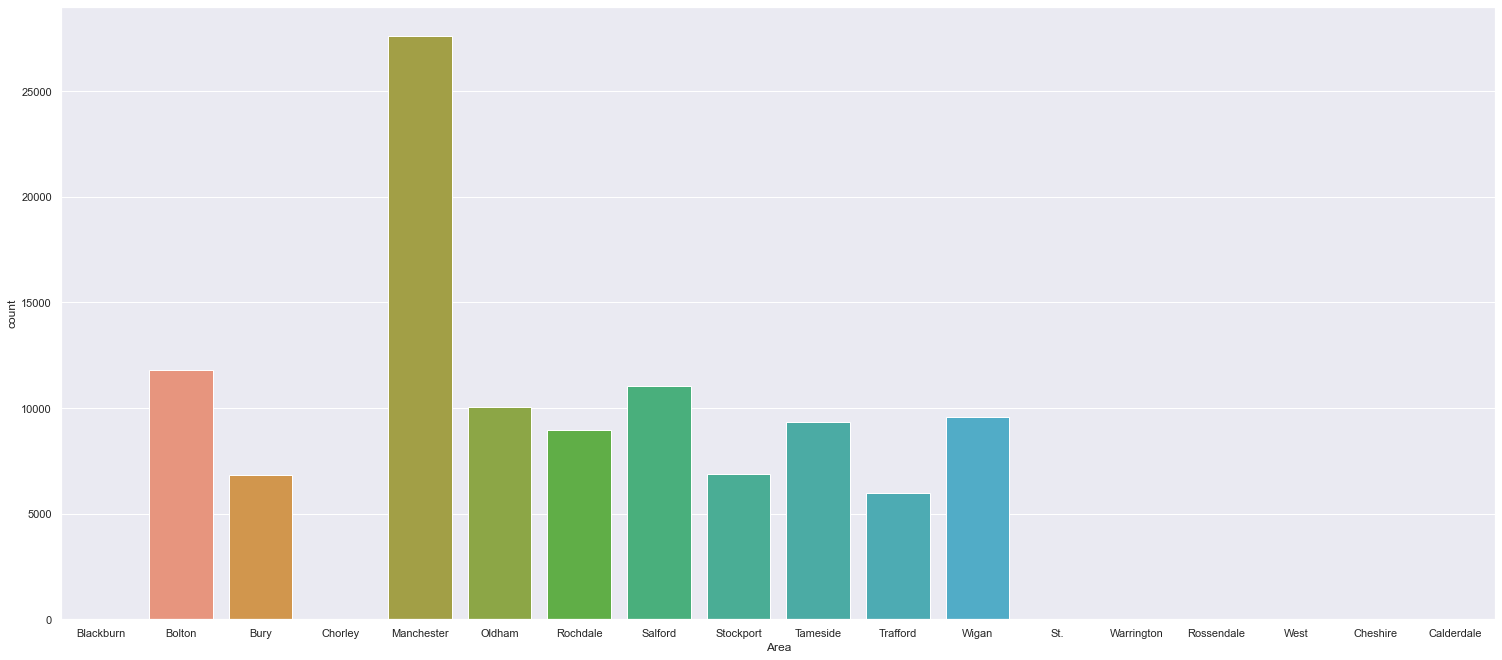

In [69]:
sns.countplot(x='Area',data=sv)

In [70]:
sex_violence['Area'].max()

'Wigan'

In [71]:
sex_violence.sort_values('month',ascending=False) 
# Sort values by col2 in descending order

,month,Area,Crime type,freq
1178,12,Wigan,Violence and sexual offences,762
1127,12,Rochdale,Violence and sexual offences,678
1089,12,Bolton,Violence and sexual offences,925
1098,12,Bury,Violence and sexual offences,499
1100,12,Cheshire,Violence and sexual offences,2
...,...,...,...,...
67,1,Stockport,Violence and sexual offences,559
76,1,Tameside,Violence and sexual offences,726
85,1,Trafford,Violence and sexual offences,466
97,1,Wigan,Violence and sexual offences,726


In [72]:
other_crimes=grp2[grp2['Crime type']!='Violence and sexual offences']
other_crimes


,month,Area,Crime type,freq
0,1,Blackburn,Theft,2
2,1,Bolton,Anti-social behaviour,399
3,1,Bolton,Criminal damage and arson,376
4,1,Bolton,Drugs,33
5,1,Bolton,Other crime,80
...,...,...,...,...
1173,12,Wigan,Other crime,64
1174,12,Wigan,Possession of weapons,13
1175,12,Wigan,Public order,250
1176,12,Wigan,Theft,653


In [73]:
df4

,Month,Reported by,Falls within,Longitude,Latitude,Location,Crime type,Area
0,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,Theft,Blackburn
1,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,Theft,Blackburn
2,2018-01,Greater Manchester Police,Greater Manchester Police,-2.462774,53.622101,On or near Scout Road,Violence and sexual offences,Blackburn
3,2018-01,Greater Manchester Police,Greater Manchester Police,-2.444683,53.611159,On or near Horrocks Fold Avenue,Theft,Bolton
4,2018-01,Greater Manchester Police,Greater Manchester Police,-2.440493,53.612388,On or near Threlkeld Road,Theft,Bolton
...,...,...,...,...,...,...,...,...
393156,2018-12,Greater Manchester Police,Greater Manchester Police,-2.565764,53.470625,On or near Norwood Avenue,Anti-social behaviour,Wigan
393157,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,On or near Martland Avenue,Theft,Wigan
393158,2018-12,Greater Manchester Police,Greater Manchester Police,-2.573754,53.468771,On or near Martland Avenue,Theft,Wigan
393159,2018-12,Greater Manchester Police,Greater Manchester Police,-2.570491,53.470387,On or near Malton Avenue,Vehicle crime,Wigan


In [74]:
import numpy as np

In [75]:
grp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month       1179 non-null   int32 
 1   Area        1179 non-null   object
 2   Crime type  1179 non-null   object
 3   freq        1179 non-null   int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 32.4+ KB


# Model Preperation and prediction

## Linear Regression

In [76]:
grp3=grp2

In [77]:
grp2

,month,Area,Crime type,freq
0,1,Blackburn,Theft,2
1,1,Blackburn,Violence and sexual offences,1
2,1,Bolton,Anti-social behaviour,399
3,1,Bolton,Criminal damage and arson,376
4,1,Bolton,Drugs,33
...,...,...,...,...
1174,12,Wigan,Possession of weapons,13
1175,12,Wigan,Public order,250
1176,12,Wigan,Theft,653
1177,12,Wigan,Vehicle crime,255


In [78]:
# Extracting relevant features


In [79]:
#Dealing with the categorical features
from sklearn.preprocessing import LabelEncoder

In [80]:
le= LabelEncoder()

In [81]:
grp3.iloc[:,1] = le.fit_transform(grp3.iloc[:,1])

In [82]:
grp3.iloc[:,2] = le.fit_transform(grp3.iloc[:,2])

In [83]:
grp3.sample(10)

,month,Area,Crime type,freq
79,1,15,2,20
730,8,9,6,471
179,2,15,6,394
990,11,2,1,180
546,6,11,3,80
218,3,7,2,145
409,5,2,4,13
536,6,9,2,26
428,5,8,2,34
1034,11,11,5,371


In [84]:
#Seperate the features and labels
x = grp3.iloc[:,:-1]
y= grp3.iloc[:,-1]

In [85]:
x.head()

,month,Area,Crime type
0,1,0,6
1,1,0,8
2,1,1,0
3,1,1,1
4,1,1,2


In [86]:
y.head()

0      2
1      1
2    399
3    376
4     33
Name: freq, dtype: int64

In [87]:
# splitting  dataset into training and testing dataset
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2, random_state=2)

In [89]:
# Training the model
from sklearn.linear_model import LinearRegression

In [90]:
regressor = LinearRegression()

In [91]:
#Starting the Training of model
regressor.fit(x_train,y_train)

LinearRegression()

In [92]:
#predictions
y_pred = regressor.predict(x_test)


In [93]:
y_pred

array([108.38072442, 501.65376331, 501.91228894, 199.74026072,
       501.39523769, 454.07350037, 208.27632191, 413.63701533,
       174.37857291, 532.26757397, 229.98386073, 141.50891148,
       267.64744374, 210.59102266, 388.22249248, 206.22014678,
       498.31097499, 308.80065567, 485.86223919, 172.32239778,
       486.43212548, 202.10779652, 314.45814474, 538.43609936,
       543.63538716, 138.62432443, 478.14857499, 487.6598887 ,
       340.90075516, 264.25182037, 400.92975391, 355.66419172,
       538.69462498, 456.07684045, 430.25695137, 296.86295618,
       223.29828409, 484.31710038, 138.36579881, 490.08627447,
       220.73107265, 226.38254678, 507.16441178, 486.69065111,
       263.68193408, 302.83180592, 526.55724985, 109.60848763,
       216.81839803, 190.42862266, 298.91913131, 303.85989349,
       343.72649223, 259.56958382, 257.45455871, 393.67429097,
       130.59929956,  90.47417519, 178.7494488 , 311.31503207,
       243.51953407, 393.47461533, 401.18827953, 581.44

In [94]:
pd.DataFrame(
{
    'ACTUAL':y_test,
    'PREDICTED': y_pred
}
).sample(5)

,ACTUAL,PREDICTED
83,390,393.674291
265,51,262.136795
439,25,346.041193
568,476,396.558878
1096,388,486.690651


In [95]:
#model performance
from sklearn import metrics


In [96]:
#model performance
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 240.36359791570646
Mean Squared Error: 112948.55446298701
Root Mean Squared Error: 336.0781969467627


In [97]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.07394802204969786


In [98]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## SUPPORT VECTOR MACHINE (SVM)



In [99]:
grp3

,month,Area,Crime type,freq
0,1,0,6,2
1,1,0,8,1
2,1,1,0,399
3,1,1,1,376
4,1,1,2,33
...,...,...,...,...
1174,12,18,4,13
1175,12,18,5,250
1176,12,18,6,653
1177,12,18,7,255


In [100]:
#splitting dataset into training and testing datasets
x1= grp3[['month','Area','Crime type']].values
y1= grp3['freq']

In [101]:
x1

array([[ 1,  0,  6],
       [ 1,  0,  8],
       [ 1,  1,  0],
       ...,
       [12, 18,  6],
       [12, 18,  7],
       [12, 18,  8]])

In [102]:
y1

0         2
1         1
2       399
3       376
4        33
       ... 
1174     13
1175    250
1176    653
1177    255
1178    762
Name: freq, Length: 1179, dtype: int64

In [103]:
grp3.dtypes

month         int32
Area          int32
Crime type    int32
freq          int64
dtype: object

In [104]:
#splitting the dataset into training and testing datasets

In [105]:
X_train,X_test,Y_train,Y_test= train_test_split(x1,y1,test_size= 0.1)

In [106]:
#training the model 

In [107]:
svm_model= SVC(kernel="linear")

In [108]:
#fitting the model
svm_model.fit(X_train,Y_train)

SVC(kernel='linear')

In [109]:
# making the predictions
svm_predictions= svm_model.predict(X_test)

In [110]:
svm_predictions[:10]

array([  1,   1, 793,   2,   1,   1, 337,   1,   1,   1], dtype=int64)

In [111]:
Y_test

891     148
41      274
779     189
1129      2
1063    533
       ... 
997     589
924      42
1164    134
142     253
526     296
Name: freq, Length: 118, dtype: int64

In [112]:
svm_predictions

array([  1,   1, 793,   2,   1,   1, 337,   1,   1,   1,   1,   1,   2,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1, 704, 481,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,  34,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1, 230,   1,   1,   1,   1,
        19,   1,   1,   1,   1,   1, 495,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
       648,   1,   1,   1,   1,   1, 326,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1, 926,   1,   1, 399,   1,   1,   1,   1,
         1], dtype=int64)

In [113]:
pd.DataFrame(
{
     'ACTUAL': Y_test,
    'PREDICTED':svm_predictions   
}

).sample(3)

,ACTUAL,PREDICTED
280,1,1
924,42,1
473,200,1


In [114]:
#model performance
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,svm_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,svm_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,svm_predictions)))

Mean Absolute Error: 318.135593220339
Mean Squared Error: 301043.27118644066
Root Mean Squared Error: 548.6741028939134


In [115]:
from sklearn.metrics import r2_score
R2 = r2_score(Y_test,svm_predictions)
print(R2)

-0.48489724765194


## Decision Tree

In [116]:
grp3

,month,Area,Crime type,freq
0,1,0,6,2
1,1,0,8,1
2,1,1,0,399
3,1,1,1,376
4,1,1,2,33
...,...,...,...,...
1174,12,18,4,13
1175,12,18,5,250
1176,12,18,6,653
1177,12,18,7,255


In [117]:
#extract the features and labels
x2= grp3.drop('freq',axis=1)
y2= grp3['freq']

In [118]:
x2.head()

,month,Area,Crime type
0,1,0,6
1,1,0,8
2,1,1,0
3,1,1,1
4,1,1,2


In [119]:
y2.head()

0      2
1      1
2    399
3    376
4     33
Name: freq, dtype: int64

In [120]:
# split the dataset into trainig and testind dataset
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test= train_test_split(x2,y2,test_size=0.20)


In [121]:
#start training our dataset
from sklearn.tree import DecisionTreeRegressor
regr=DecisionTreeRegressor()

In [122]:
#fitting the model
regr.fit(X_Train,Y_Train)

DecisionTreeRegressor()

In [123]:
#making prediction
y2_pred= regr.predict(X_Test)

In [124]:
y2_pred[:10]

array([ 151.,   25.,   95.,  742.,   11.,   69.,  203.,   14.,  500.,
       1017.])

In [125]:
#Evaluating the model

In [126]:
Y_Test

269      127
634       25
220       83
1056     846
206       23
        ... 
831        1
810     2273
475      373
612     1439
1150      42
Name: freq, Length: 236, dtype: int64

In [127]:
y2_pred

array([1.510e+02, 2.500e+01, 9.500e+01, 7.420e+02, 1.100e+01, 6.900e+01,
       2.030e+02, 1.400e+01, 5.000e+02, 1.017e+03, 2.280e+02, 1.950e+02,
       1.000e+00, 1.750e+02, 4.870e+02, 2.490e+02, 3.580e+02, 1.000e+00,
       3.040e+02, 2.600e+01, 3.850e+02, 8.380e+02, 1.810e+02, 2.770e+02,
       1.000e+00, 2.330e+02, 1.343e+03, 7.030e+02, 1.900e+01, 3.580e+02,
       3.940e+02, 2.100e+01, 4.020e+02, 6.380e+02, 2.400e+01, 2.370e+02,
       4.290e+02, 5.800e+02, 1.200e+01, 3.950e+02, 1.400e+02, 5.890e+02,
       2.900e+01, 2.700e+01, 9.310e+02, 4.010e+02, 2.440e+02, 5.780e+02,
       2.830e+02, 1.890e+02, 4.900e+02, 5.200e+01, 4.670e+02, 1.400e+01,
       7.000e+01, 2.500e+01, 1.050e+02, 2.540e+02, 9.210e+02, 1.000e+00,
       1.500e+02, 2.370e+02, 4.920e+02, 6.720e+02, 7.210e+02, 2.810e+02,
       4.200e+01, 6.100e+01, 1.510e+02, 1.000e+00, 6.300e+01, 3.000e+00,
       2.280e+02, 2.550e+02, 6.700e+01, 2.870e+02, 2.400e+01, 4.470e+02,
       3.430e+02, 2.200e+01, 3.550e+02, 7.500e+01, 

In [128]:
pd.DataFrame(
{
    'ACTUAL':Y_Test,
    'PREDICTED': y2_pred
}
).sample(5)

,ACTUAL,PREDICTED
220,83,95.0
412,194,150.0
646,627,578.0
8,718,629.0
241,207,253.0


In [129]:
pd.DataFrame(
{
    'ACTUAL':Y_Test,
    'PREDICTED': y2_pred
}
).sample(15)

,ACTUAL,PREDICTED
706,1481,1343.0
810,2273,2375.0
1000,2,3.0
1016,685,638.0
791,717,760.0
878,189,189.0
405,322,281.0
490,622,641.0
788,67,67.0
736,38,30.0


In [130]:
pd.DataFrame(
{
    'ACTUAL':Y_Test,
    'PREDICTED': y2_pred
}
).sample(25)

,ACTUAL,PREDICTED
432,544,498.0
155,420,420.0
490,622,641.0
247,83,67.0
227,25,23.0
1000,2,3.0
491,240,218.0
610,2,1.0
22,1328,1318.0
1128,1,1.0


In [132]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_Test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_Test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_Test, y2_pred)))

Mean Absolute Error: 40.101694915254235
Mean Squared Error: 5611.177966101695
Root Mean Squared Error: 74.90779643069001


In [133]:
from sklearn.metrics import r2_score
r_2 = r2_score(Y_Test, y2_pred)
print(r_2)

0.9604178353069065
